<a href="https://colab.research.google.com/github/GLADIATRO/Project/blob/main/Copy_of_Wildlife_Movement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import math

In [ ]:
# Load the dataset
df = pd.read_csv('/content/migration_original.csv')
print(df.shape)
df.head()

(89867, 15)


,event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,visible.1,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,ECMWF Interim Full Daily Invariant Low Vegetation Cover,NCEP NARR SFC Vegetation at Surface,ECMWF Interim Full Daily Invariant High Vegetation Cover
0,1082620685,True,2009-05-27 14:00:00.000,24.58617,61.24783,NaN,True,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...,0.039229,NaN,0.960771
1,1082620686,True,2009-05-27 20:00:00.000,24.58217,61.23267,NaN,True,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...,0.040803,NaN,0.959197
2,1082620687,True,2009-05-28 05:00:00.000,24.53133,61.18833,NaN,True,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...,0.052201,NaN,0.947799
3,1082620688,True,2009-05-28 08:00:00.000,24.58200,61.23283,NaN,True,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...,0.040818,NaN,0.959182
4,1082620689,True,2009-05-28 14:00:00.000,24.58250,61.23267,NaN,True,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...,0.040753,NaN,0.959247


In [ ]:
# Check for unique values in all the columns
for column in df.columns:
  print(f'The Unique Columns present in "{column}" are: ',df[column].unique(), "\n")

The Unique Columns present in "event-id" are:  [1082620685 1082620686 1082620687 ... 1082710937 1082710938 1082710939] 

The Unique Columns present in "visible" are:  [ True] 

The Unique Columns present in "timestamp" are:  ['2009-05-27 14:00:00.000' '2009-05-27 20:00:00.000'
 '2009-05-28 05:00:00.000' ... '2015-08-26 21:00:00.000'
 '2015-08-27 06:00:00.000' '2015-08-27 09:00:00.000'] 

The Unique Columns present in "location-long" are:  [24.58617 24.58217 24.53133 ... 35.69217 35.71483 35.66567] 

The Unique Columns present in "location-lat" are:  [61.24783 61.23267 61.18833 ... 64.95367 64.97133 65.019  ] 

The Unique Columns present in "manually-marked-outlier" are:  [nan] 

The Unique Columns present in "visible.1" are:  [ True] 

The Unique Columns present in "sensor-type" are:  ['gps'] 

The Unique Columns present in "individual-taxon-canonical-name" are:  ['Larus fuscus'] 

The Unique Columns present in "tag-local-identifier" are:  [91732 91733 91734 91735 91737 91738 91739 917

In [ ]:
'''
    1. As some Columns contain all null values or a single value for entire dataset,
       they does not contribute to the output at all thus we will drop them.

    2. Also as "individual-local-identifier" is the same as that of "tag-local-identifier"
       just with an extension of "A" they become similar.

    3. Again, "ECMWF Interim Full Daily Invariant Low Vegetation Cover" and "ECMWF Interim Full Daily Invariant High Vegetation Cover"
       are complementary to each other. Thus, do not need to keep both in our dataset for training. Any one can be dropped.
'''

# define Columns to drop
columns_to_drop = ["event-id","visible", "visible.1", "sensor-type", "individual-taxon-canonical-name", "study-name", "manually-marked-outlier",
                   "NCEP NARR SFC Vegetation at Surface", "individual-local-identifier", "ECMWF Interim Full Daily Invariant Low Vegetation Cover"]

# drop unwanted columns
data = df.drop(columns=columns_to_drop)
data.head()

,timestamp,location-long,location-lat,tag-local-identifier,ECMWF Interim Full Daily Invariant High Vegetation Cover
0,2009-05-27 14:00:00.000,24.58617,61.24783,91732,0.960771
1,2009-05-27 20:00:00.000,24.58217,61.23267,91732,0.959197
2,2009-05-28 05:00:00.000,24.53133,61.18833,91732,0.947799
3,2009-05-28 08:00:00.000,24.58200,61.23283,91732,0.959182
4,2009-05-28 14:00:00.000,24.58250,61.23267,91732,0.959247


In [ ]:
# Check for data types and Null counts using info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89867 entries, 0 to 89866
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   timestamp                                                 89867 non-null  object 
 1   location-long                                             89867 non-null  float64
 2   location-lat                                              89867 non-null  float64
 3   tag-local-identifier                                      89867 non-null  int64  
 4   ECMWF Interim Full Daily Invariant High Vegetation Cover  89867 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.4+ MB


In [ ]:
# -------------------- STEP 1: Load Data -------------------- #
# Ensure timestamps are in datetime format
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [ ]:
# -------------------- STEP 2: Group Data by Tag -------------------- #
# This groups the dataset by "tag-local-identifier" so that birds are clearly separated
data = data.sort_values(by=["tag-local-identifier", "timestamp"]).reset_index(drop=True)

In [ ]:
# -------------------- STEP 3: Extract Date-Time Features -------------------- #
data["year"] = data["timestamp"].dt.year
data["month"] = data["timestamp"].dt.month
data["hour"] = data["timestamp"].dt.hour

In [ ]:
# -------------------- STEP 4: Compute Time Difference per Bird -------------------- #
# Compute time difference in hours within each group (bird)
data["time_diff(hrs)"] = data.groupby("tag-local-identifier")["timestamp"].diff().dt.total_seconds() / 3600
data["time_diff(hrs)"].fillna(0, inplace=True)  # Replace NaN with 0 for the first row per bird

<ipython-input-9-dbbba9e85c2a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["time_diff(hrs)"].fillna(0, inplace=True)  # Replace NaN with 0 for the first row per bird


In [ ]:
data.head(10)

,timestamp,location-long,location-lat,tag-local-identifier,ECMWF Interim Full Daily Invariant High Vegetation Cover,year,month,hour,time_diff(hrs)
0,2009-05-27 14:00:00,24.58617,61.24783,91732,0.960771,2009,5,14,0.0
1,2009-05-27 20:00:00,24.58217,61.23267,91732,0.959197,2009,5,20,6.0
2,2009-05-28 05:00:00,24.53133,61.18833,91732,0.947799,2009,5,5,9.0
3,2009-05-28 08:00:00,24.58200,61.23283,91732,0.959182,2009,5,8,3.0
4,2009-05-28 14:00:00,24.58250,61.23267,91732,0.959247,2009,5,14,6.0
5,2009-05-28 20:00:00,24.58617,61.24767,91732,0.960761,2009,5,20,6.0
6,2009-05-29 05:00:00,24.58600,61.24767,91732,0.960736,2009,5,5,9.0
7,2009-05-29 08:00:00,24.58617,61.24767,91732,0.960761,2009,5,8,3.0
8,2009-05-29 14:00:00,24.58650,61.24750,91732,0.960799,2009,5,14,6.0
9,2009-05-29 20:00:00,24.56967,61.23883,91732,0.957722,2009,5,20,6.0


### Haversine Formula:

To calculate the distance between two latitude and longitude points (current and previous), you can use the **Haversine formula**. This formula calculates the distance between two points on the Earth's surface, taking into account the spherical shape of the Earth.

$$
a = \sin^2\left(\frac{\Delta\phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)
$$

$$
c = 2 \cdot \text{atan2}\left(\sqrt{a}, \sqrt{1 - a}\right)
$$

$$
d = R \cdot c
$$

Where:
- $ \phi_1, \phi_2 $ are the latitudes of the two points in radians,
- $ \lambda_1, \lambda_2 $ are the longitudes of the two points in radians,
- $ R $ is the Earth's radius (mean radius = 6,371 km),
- $ d $ is the distance between the points in kilometers.


In [ ]:
# -------------------- STEP 5: Define Haversine Distance Function -------------------- #
def haversine(lat1, lon1, lat2, lon2):
    """Compute the great-circle distance (Haversine formula) between two GPS coordinates."""
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = map(math.radians, [lat1, lat2])
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in km

In [ ]:
# -------------------- STEP 6: Compute Distance per Bird -------------------- #
# Compute previous lat/lon per bird before applying Haversine formula
data["prev_lat"] = data.groupby("tag-local-identifier")["location-lat"].shift(1)
data["prev_lon"] = data.groupby("tag-local-identifier")["location-long"].shift(1)

# Apply Haversine function to compute distances
data["distance(km)"] = data.apply(
    lambda row: haversine(row["prev_lat"], row["prev_lon"], row["location-lat"], row["location-long"])
    if pd.notna(row["prev_lat"]) and pd.notna(row["prev_lon"]) else 0, axis=1
)

# Drop temporary columns
data.drop(columns=["prev_lat", "prev_lon"], inplace=True)

In [ ]:
# -------------------- STEP 7: Compute Speed (Avoid Division by Zero) -------------------- #
data["speed(km/hr)"] = data["distance(km)"] / data["time_diff(hrs)"]
data["speed(km/hr)"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)  # Replace NaN with 0

<ipython-input-13-8a07ea0ecddf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["speed(km/hr)"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
import folium
from folium.plugins import AntPath
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Ensure timestamp is in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Get unique years, months, and tags
unique_years = sorted(data['year'].unique())
unique_months = sorted(data['month'].unique())
unique_tags = sorted(data['tag-local-identifier'].unique())

# Assign colors to each tag using Matplotlib colormap
color_map = plt.cm.get_cmap('tab10', len(unique_tags))  # Use 'tab10' for distinct colors
tag_colors = {tag: f"#{int(color_map(i)[0]*255):02x}{int(color_map(i)[1]*255):02x}{int(color_map(i)[2]*255):02x}"
              for i, tag in enumerate(unique_tags)}

# Create dropdowns for year and month selection
year_selector = widgets.SelectMultiple(
    options=unique_years, value=[unique_years[0]], description='Years',
    layout=widgets.Layout(height='100px', width='150px')
)

month_selector = widgets.SelectMultiple(
    options=unique_months, value=[unique_months[0]], description='Months',
    layout=widgets.Layout(height='100px', width='150px')
)

# Button to update the map
update_button = widgets.Button(description="Update Map")

# Output widget to display the map
output = widgets.Output()

# Function to plot movement interactively
def plot_movement_interactive(years, months):
    # Filter data
    filtered_data = data[data["year"].isin(years) & data["month"].isin(months)]

    if filtered_data.empty:
        with output:
            clear_output(wait=True)
            print("No data available for the selected period.")
        return None

    # Initialize the map at the first valid location
    first_point = (filtered_data.iloc[0]["location-lat"], filtered_data.iloc[0]["location-long"])
    m = folium.Map(location=first_point, zoom_start=8)

    # Loop through each tag (bird) and plot points with unique colors
    for tag in filtered_data["tag-local-identifier"].unique():
        bird_data = filtered_data[filtered_data["tag-local-identifier"] == tag]
        bird_color = tag_colors[tag]

        # Extract path
        path = list(zip(bird_data["location-lat"], bird_data["location-long"]))

        # Add movement path
        folium.PolyLine(path, color=bird_color, weight=2.5, opacity=0.8).add_to(m)

        # Add points with assigned color
        for _, row in bird_data.iterrows():
            folium.CircleMarker(
                location=(row["location-lat"], row["location-long"]),
                radius=5,
                color=bird_color,
                fill=True,
                fill_color=bird_color,
                popup=f"Tag: {tag}<br>Time: {row['timestamp']}",
            ).add_to(m)

    return m

# Button click event
def on_button_click(b):
    output.clear_output(wait=True)  # Ensures the output updates properly every time

    # Convert numpy.int32 values to standard Python integers
    selected_years = [int(year) for year in year_selector.value]
    selected_months = [int(month) for month in month_selector.value]

    map_plot = plot_movement_interactive(selected_years, selected_months)
    if map_plot:
        with output:
            display(map_plot)

update_button.on_click(on_button_click)

# Display widgets and output
display(widgets.HBox([year_selector, month_selector]))
display(update_button, output)


<ipython-input-14-d767d0ebebcc>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', len(unique_tags))  # Use 'tab10' for distinct colors


Button(description='Update Map', style=ButtonStyle())

Output()

In [ ]:
import folium
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from folium.plugins import TimestampedGeoJson
import matplotlib.pyplot as plt

# Ensure timestamp is in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Get unique tag-local-identifiers
unique_tags = sorted(data['tag-local-identifier'].unique())

# Assign unique colors to each tag using Matplotlib colormap
color_map = plt.cm.get_cmap('tab10', len(unique_tags))  # Use 'tab10' for distinct colors
tag_colors = {tag: f"#{int(color_map(i)[0]*255):02x}{int(color_map(i)[1]*255):02x}{int(color_map(i)[2]*255):02x}"
              for i, tag in enumerate(unique_tags)}

# Create dropdowns for tag, year, and month selection
tag_selector = widgets.Dropdown(
    options=unique_tags,
    value=unique_tags[0],  # Default selection
    description='Tag:',
    layout=widgets.Layout(width='200px')
)

year_selector = widgets.Dropdown(
    options=[],  # Initially empty, will be populated dynamically
    description='Year:',
    layout=widgets.Layout(width='200px')
)

month_selector = widgets.Dropdown(
    options=[],  # Initially empty, will be populated dynamically
    description='Month:',
    layout=widgets.Layout(width='200px')
)

# Button to update the map
update_button = widgets.Button(description="Update Map")

# Output widget to display the map
output = widgets.Output()
# Function to update year and month dropdowns based on selected tag
def update_year_month_dropdowns(tag):
    filtered_data = data[data["tag-local-identifier"] == tag]

    unique_years = sorted(filtered_data['year'].unique())
    unique_months = sorted(filtered_data['month'].unique())

    # Update dropdown options
    year_selector.options = unique_years
    month_selector.options = unique_months

    # Set default values if the current selections are invalid
    if year_selector.value not in unique_years and unique_years:
        year_selector.value = unique_years[0]  # Set to first available year
    if month_selector.value not in unique_months and unique_months:
        month_selector.value = unique_months[0]  # Set to first available month
# Function to plot movement with animation and lines
def plot_movement_interactive(tag, year, month):
    filtered_data = data[
        (data["tag-local-identifier"] == tag) &
        (data["year"] == year) &
        (data["month"] == month)
    ]

    if filtered_data.empty:
        with output:
            clear_output(wait=True)
            print("No data available for the selected tag, year, and month.")
        return None

    filtered_data = filtered_data.sort_values(by="timestamp")

    bird_color = tag_colors[tag]

    first_point = (filtered_data.iloc[0]["location-lat"], filtered_data.iloc[0]["location-long"])
    m = folium.Map(location=first_point, zoom_start=8)

    features = []
    path_coordinates = []

    for _, row in filtered_data.iterrows():
        point_feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': [row["location-long"], row["location-lat"]]
            },
            'properties': {
                'time': row['timestamp'].isoformat(),
                'popup': f"Tag: {tag}<br>Time: {row['timestamp']}",
                'icon': 'circle',
                'iconstyle': {
                    'fillColor': bird_color,
                    'fillOpacity': 0.6,
                    'stroke': 'false',
                    'radius': 5
                }
            }
        }
        features.append(point_feature)
        path_coordinates.append([row["location-long"], row["location-lat"]])

    line_feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': path_coordinates
        },
        'properties': {
            'times': [row['timestamp'].isoformat() for _, row in filtered_data.iterrows()],
            'style': {
                'color': bird_color,
                'weight': 2
            }
        }
    }
    features.append(line_feature)

    TimestampedGeoJson(
        {'type': 'FeatureCollection', 'features': features},
        period='PT1M',
        add_last_point=True,
        auto_play=True,
        loop=False,
        max_speed=30,
        loop_button=True,
        date_options='YYYY/MM/DD HH:mm:ss',
        time_slider_drag_update=True
    ).add_to(m)

    return m

# Button click event
def on_button_click(b):
    output.clear_output(wait=True)
    selected_tag = tag_selector.value
    selected_year = year_selector.value
    selected_month = month_selector.value
    map_plot = plot_movement_interactive(selected_tag, selected_year, selected_month)
    if map_plot:
        with output:
            display(map_plot)

# Update year and month dropdowns when tag is selected
def on_tag_change(change):
    update_year_month_dropdowns(change['new'])

tag_selector.observe(on_tag_change, names='value')

update_year_month_dropdowns(tag_selector.value)

update_button.on_click(on_button_click)

display(widgets.VBox([tag_selector, year_selector, month_selector]))
display(update_button, output)


<ipython-input-15-2dc8aa2f1601>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', len(unique_tags))  # Use 'tab10' for distinct colors


Button(description='Update Map', style=ButtonStyle())

Output()

In [ ]:
# -------------------- STEP 8: Compute Bearing (Direction of Movement) -------------------- #
# Function to calculate bearing between two GPS points
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the initial bearing (direction) from point (lat1, lon1) to (lat2, lon2).
    The result is in degrees (0° = North, 90° = East, 180° = South, 270° = West).
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    delta_lon = lon2 - lon1
    x = np.sin(delta_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)

    initial_bearing = np.arctan2(x, y)
    initial_bearing = np.degrees(initial_bearing)

    # Normalize to 0-360 degrees
    return (initial_bearing + 360) % 360

# Initialize new bearing column
data["bearing"] = 0  # Set default to 0

# Compute bearing for each bird individually
for tag in data["tag-local-identifier"].unique():
    tag_data = data[data["tag-local-identifier"] == tag]

    lat1 = tag_data["location-lat"].shift(1)
    lon1 = tag_data["location-long"].shift(1)
    lat2 = tag_data["location-lat"]
    lon2 = tag_data["location-long"]

    bearings = calculate_bearing(lat1, lon1, lat2, lon2)

    # Replace NaN values with 0
    data.loc[data["tag-local-identifier"] == tag, "bearing"] = bearings.fillna(0)

<ipython-input-16-9fbb1e388fc1>:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  0.         187.23671315 208.92940735 ...   0.           0.
   0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["tag-local-identifier"] == tag, "bearing"] = bearings.fillna(0)


In [ ]:
# -------------------- STEP 9: Encode Cyclic Time Features (Preserve Temporal Patterns) -------------------- #
# Convert hour to cyclic feature
data["hour_sin"] = np.sin(2 * np.pi * data["hour"] / 24)
data["hour_cos"] = np.cos(2 * np.pi * data["hour"] / 24)

# Convert month to cyclic feature
data["month_sin"] = np.sin(2 * np.pi * data["month"] / 12)
data["month_cos"] = np.cos(2 * np.pi * data["month"] / 12)

# Drop original columns
data.drop(["hour", "month"], axis=1, inplace=True)


In [ ]:
# -------------------- STEP 8: Reorder Columns -------------------- #
desired_order = ["tag-local-identifier", "timestamp", "year", "month_sin", "month_cos", "hour_sin","hour_cos", "time_diff(hrs)", "distance(km)", "speed(km/hr)",
                 "ECMWF Interim Full Daily Invariant High Vegetation Cover", "bearing",
                "location-long", "location-lat"
                ]
data = data[desired_order]

In [ ]:
data.head()

,tag-local-identifier,timestamp,year,month_sin,month_cos,hour_sin,hour_cos,time_diff(hrs),distance(km),speed(km/hr),ECMWF Interim Full Daily Invariant High Vegetation Cover,bearing,location-long,location-lat
0,91732,2009-05-27 14:00:00,2009,0.5,-0.866025,-0.500000,-0.866025,0.0,0.000000,0.000000,0.960771,0.000000,24.58617,61.24783
1,91732,2009-05-27 20:00:00,2009,0.5,-0.866025,-0.866025,0.500000,6.0,1.699244,0.283207,0.959197,187.236713,24.58217,61.23267
2,91732,2009-05-28 05:00:00,2009,0.5,-0.866025,0.965926,0.258819,9.0,5.632120,0.625791,0.947799,208.929407,24.53133,61.18833
3,91732,2009-05-28 08:00:00,2009,0.5,-0.866025,0.866025,-0.500000,3.0,5.643315,1.881105,0.959182,28.716637,24.58200,61.23283
4,91732,2009-05-28 14:00:00,2009,0.5,-0.866025,-0.500000,-0.866025,6.0,0.032131,0.005355,0.959247,123.620959,24.58250,61.23267


In [ ]:
data.drop(columns=['year', 'time_diff(hrs)', 'ECMWF Interim Full Daily Invariant High Vegetation Cover'], axis=1, inplace=True)

In [ ]:
data.head()

,tag-local-identifier,timestamp,month_sin,month_cos,hour_sin,hour_cos,distance(km),speed(km/hr),bearing,location-long,location-lat
0,91732,2009-05-27 14:00:00,0.5,-0.866025,-0.500000,-0.866025,0.000000,0.000000,0.000000,24.58617,61.24783
1,91732,2009-05-27 20:00:00,0.5,-0.866025,-0.866025,0.500000,1.699244,0.283207,187.236713,24.58217,61.23267
2,91732,2009-05-28 05:00:00,0.5,-0.866025,0.965926,0.258819,5.632120,0.625791,208.929407,24.53133,61.18833
3,91732,2009-05-28 08:00:00,0.5,-0.866025,0.866025,-0.500000,5.643315,1.881105,28.716637,24.58200,61.23283
4,91732,2009-05-28 14:00:00,0.5,-0.866025,-0.500000,-0.866025,0.032131,0.005355,123.620959,24.58250,61.23267


Epoch 1/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.5426 - mae: 0.5451 - val_loss: 0.2507 - val_mae: 0.3643
Epoch 2/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2584 - mae: 0.3650 - val_loss: 0.2051 - val_mae: 0.3134
Epoch 3/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.2191 - mae: 0.3269 - val_loss: 0.1860 - val_mae: 0.2828
Epoch 4/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.1904 - mae: 0.2989 - val_loss: 0.1528 - val_mae: 0.2555
Epoch 5/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.1626 - mae: 0.2734 - val_loss: 0.1417 - val_mae: 0.2552
Epoch 6/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.1438 - mae: 0.2547 - val_loss: 0.1265 - val_mae: 0.2215
Epoch 7/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.1330 - mae: 0.2425 - val_loss: 0.1082 - val_mae: 0.2083
Epoch 8/50
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.1216 - mae: 0.2290 - val_loss: 0.1088 - val_mae: 0.1960
Epoch 9/50
2216/2216 ━━━━━━━━━━━

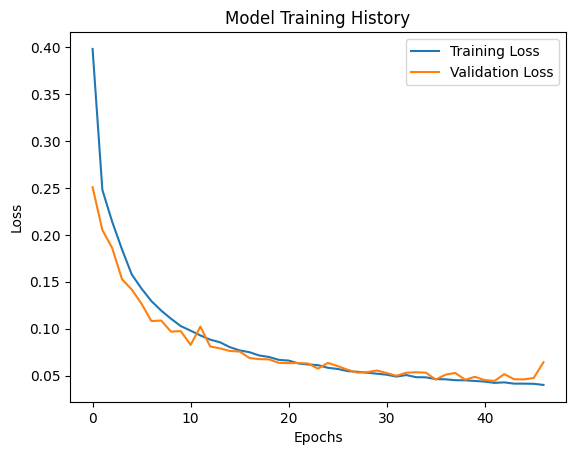

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (Assuming 'data' is already loaded)
# Define input and output features
X = data.drop(columns=['timestamp', 'location-long', 'location-lat']).to_numpy()
y = data[['location-long', 'location-lat']].to_numpy()
tags = data['tag-local-identifier'].to_numpy()

# Get unique tags
unique_tags = np.unique(tags)

# Function to create sequences using a sliding window
def create_sequences(tag_data, tag_labels, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(tag_data) - seq_length):  # Sliding window approach
        X_seq.append(tag_data[i:i + seq_length])
        y_seq.append(tag_labels[i + seq_length])  # Predict next step
    return np.array(X_seq), np.array(y_seq)

# Initialize lists to store sequences
X_sequences, y_sequences = [], []
sequence_length = 10  # Modifiable sequence length

# Create sequences for each tag
for tag in unique_tags:
    tag_indices = np.where(tags == tag)[0]  # Get indices for the tag
    tag_data = X[tag_indices]
    tag_labels = y[tag_indices]

    if len(tag_data) > sequence_length:
        X_seq, y_seq = create_sequences(tag_data, tag_labels, sequence_length)
        X_sequences.append(X_seq)
        y_sequences.append(y_seq)

# Combine sequences from all tags
X_sequences = np.vstack(X_sequences)
y_sequences = np.vstack(y_sequences)

# Train-test-validation split (80-10-10)
X_train, X_temp, y_train, y_temp = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale input features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_val = scaler_X.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Scale output (lat, long)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

# Define the model
model = Sequential([
    Input(shape=(sequence_length, X_train.shape[2])),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  # Predicting lat-long
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Save the model
model.save('next_lat_long_model.h5')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load model without compiling
model = load_model('next_lat_long_model.h5', compile=False)

# Manually compile with Mean Squared Error loss (if needed for further training)
model.compile(loss=MeanSquaredError(), optimizer='adam')

# Predict on the test dataset
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions to get actual latitude and longitude
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Calculate accuracy metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Print accuracy metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Save predictions and true values in a DataFrame
results_df = pd.DataFrame({
    'True_Longitude': y_true[:, 0],
    'True_Latitude': y_true[:, 1],
    'Predicted_Longitude': y_pred[:, 0],
    'Predicted_Latitude': y_pred[:, 1]
})

# Add error columns to the DataFrame
results_df['Longitude_Error'] = results_df['True_Longitude'] - results_df['Predicted_Longitude']
results_df['Latitude_Error'] = results_df['True_Latitude'] - results_df['Predicted_Latitude']
results_df['Absolute_Error'] = np.sqrt(results_df['Longitude_Error']**2 + results_df['Latitude_Error']**2)

# Save the DataFrame to a CSV file
results_df.to_csv('test_predictions_with_errors.csv', index=False)

# Display the first few rows of the results DataFrame
print("\nTest Predictions with Errors:")
print(results_df.head())


In [ ]:
import numpy as np

# Function to iteratively predict the next 10 lat-long values
def predict_next_10_lat_long(model, initial_sequence, scaler_X, scaler_y, sequence_length=10):
    """
    Predict the next 10 latitude and longitude values iteratively.

    Parameters:
        model: Trained Keras model.
        initial_sequence: Initial sequence of 10 lat-long values (shape: (10, 2)).
        scaler_X: Scaler used for input features.
        scaler_y: Scaler used for output features.
        sequence_length: Length of the sequence (default: 10).

    Returns:
        predictions: List of predicted lat-long values (shape: (10, 2)).
    """
    predictions = []
    current_sequence = initial_sequence.copy()

    for _ in range(10):  # Predict the next 10 values
        # Scale the current sequence
        current_sequence_scaled = scaler_X.transform(current_sequence)
        # Reshape for model input (batch_size=1, sequence_length, num_features)
        current_sequence_scaled = current_sequence_scaled.reshape((1, sequence_length, -1))
        # Predict the next lat-long value
        next_lat_long_scaled = model.predict(current_sequence_scaled, verbose=0)
        # Inverse transform to get actual lat-long values
        next_lat_long = scaler_y.inverse_transform(next_lat_long_scaled)
        predictions.append(next_lat_long[0])  # Store the prediction
        # Update the sequence: drop the oldest value and append the predicted value
        current_sequence = np.vstack([current_sequence[1:], next_lat_long])

    return np.array(predictions)

# Example usage
# Load the trained model
from tensorflow.keras.models import load_model
model = load_model('next_lat_long_model.h5', compile=False)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Example initial sequence of 10 lat-long values (replace with your actual data)
initial_sequence = np.array([
    [24.5861, 61.2478],
    [24.5821, 61.2326],
    [24.5313, 61.1883],
    [24.5820, 61.2328],
    [24.5825, 61.2326],
    [24.5830, 61.2330],
    [24.5840, 61.2340],
    [24.5850, 61.2350],
    [24.5860, 61.2360],
    [24.5870, 61.2370]
])

# Predict the next 10 lat-long values
predicted_lat_long = predict_next_10_lat_long(model, initial_sequence, scaler_X, scaler_y)

# Display the predictions
print("Predicted Next 10 Latitude and Longitude Values:")
print(predicted_lat_long)